In [ ]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Process Mining Example

Data downoaded from https://www.win.tue.nl/bpi/doku.php?id=2012:challenge, German translated to English. This is a dataset for processes related to small personal loans. This notebook demonstrates how Pm4Py can be used to investigate a log of processes to identify bottlenecks and areas for process improvement.

See also https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6312323/.

In [2]:
import sys

import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

from pm4py.algo.filtering.log.cases import case_filter

# viz
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

log_file = 'financial_log_eng.xes'

In [3]:
%%time
log = xes_importer.apply(log_file)


CPU times: user 11 s, sys: 546 ms, total: 11.5 s
Wall time: 11.5 s


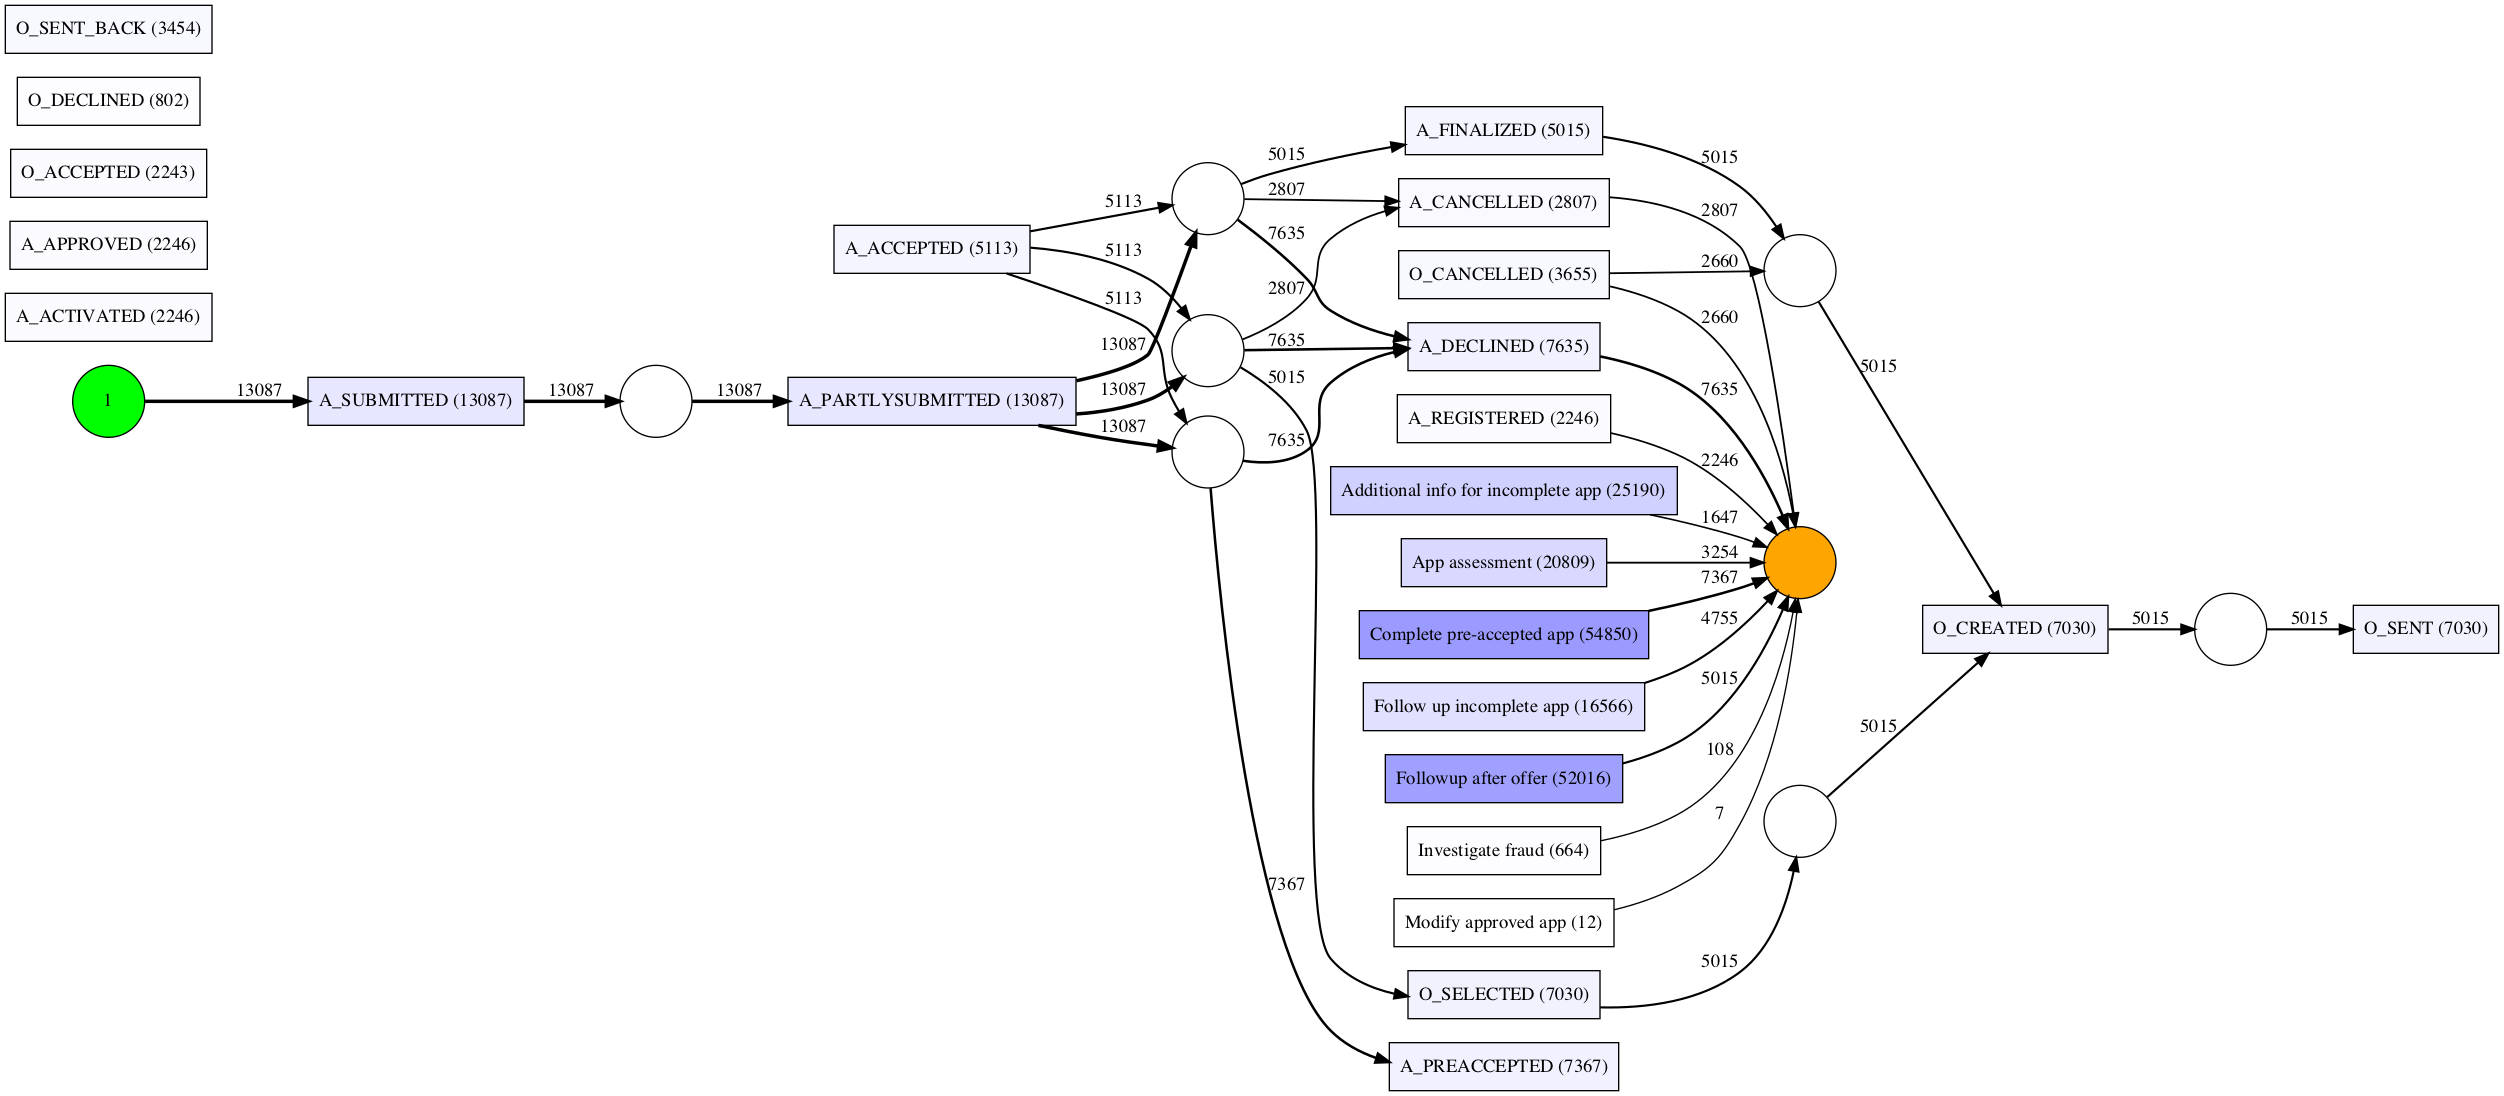

CPU times: user 11.5 s, sys: 36.3 ms, total: 11.5 s
Wall time: 11.9 s


In [4]:
%%time
net, initial_marking, final_marking = alpha_miner.apply(log)

#dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

#gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
#dfg_visualization.view(gviz)

parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)
pn_visualizer.view(gviz)
#pn_visualizer.save(gviz, "alpha_miner_petri_net.png")

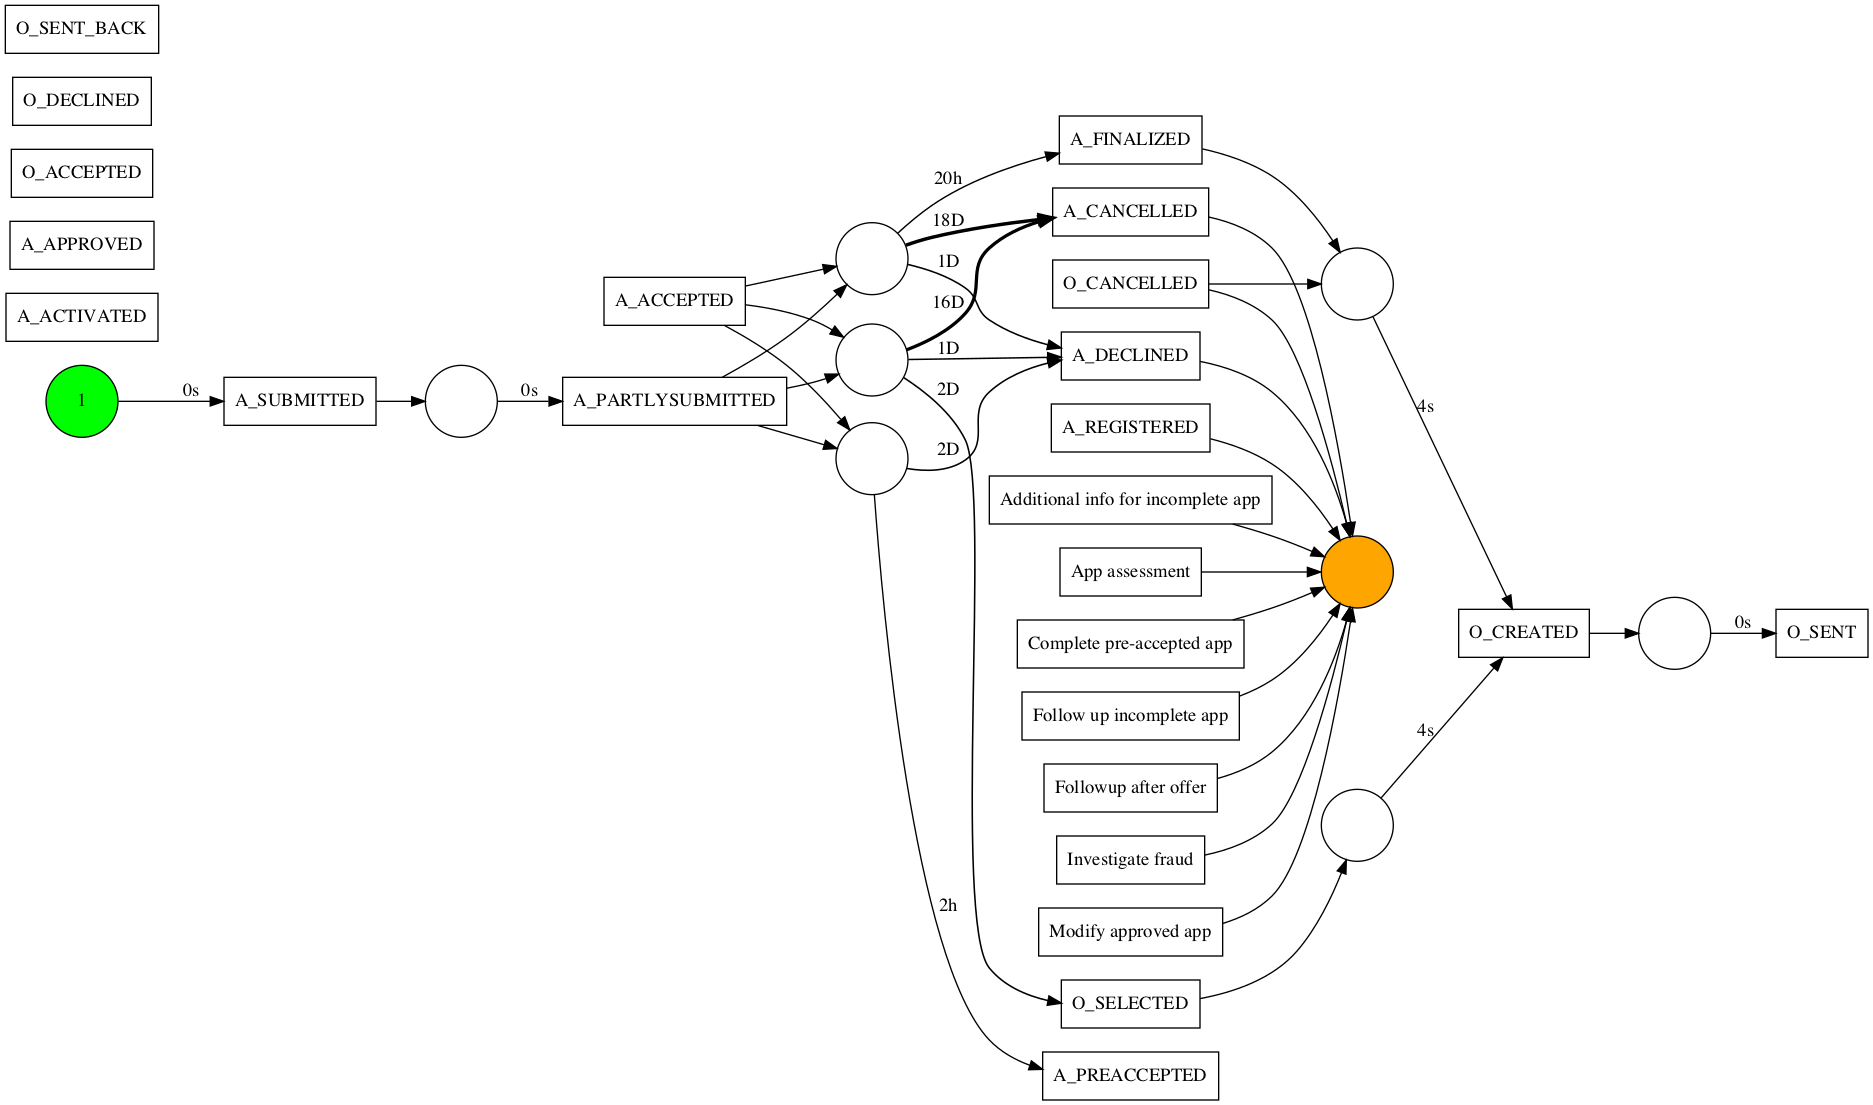

CPU times: user 11.3 s, sys: 62.8 ms, total: 11.4 s
Wall time: 11.7 s


In [5]:
%%time
net, initial_marking, final_marking = alpha_miner.apply(log)

parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters,
                           variant=pn_visualizer.Variants.PERFORMANCE,
                           log=log)
pn_visualizer.view(gviz)
#pn_visualizer.save(gviz, "alpha_miner_petri_net.png")

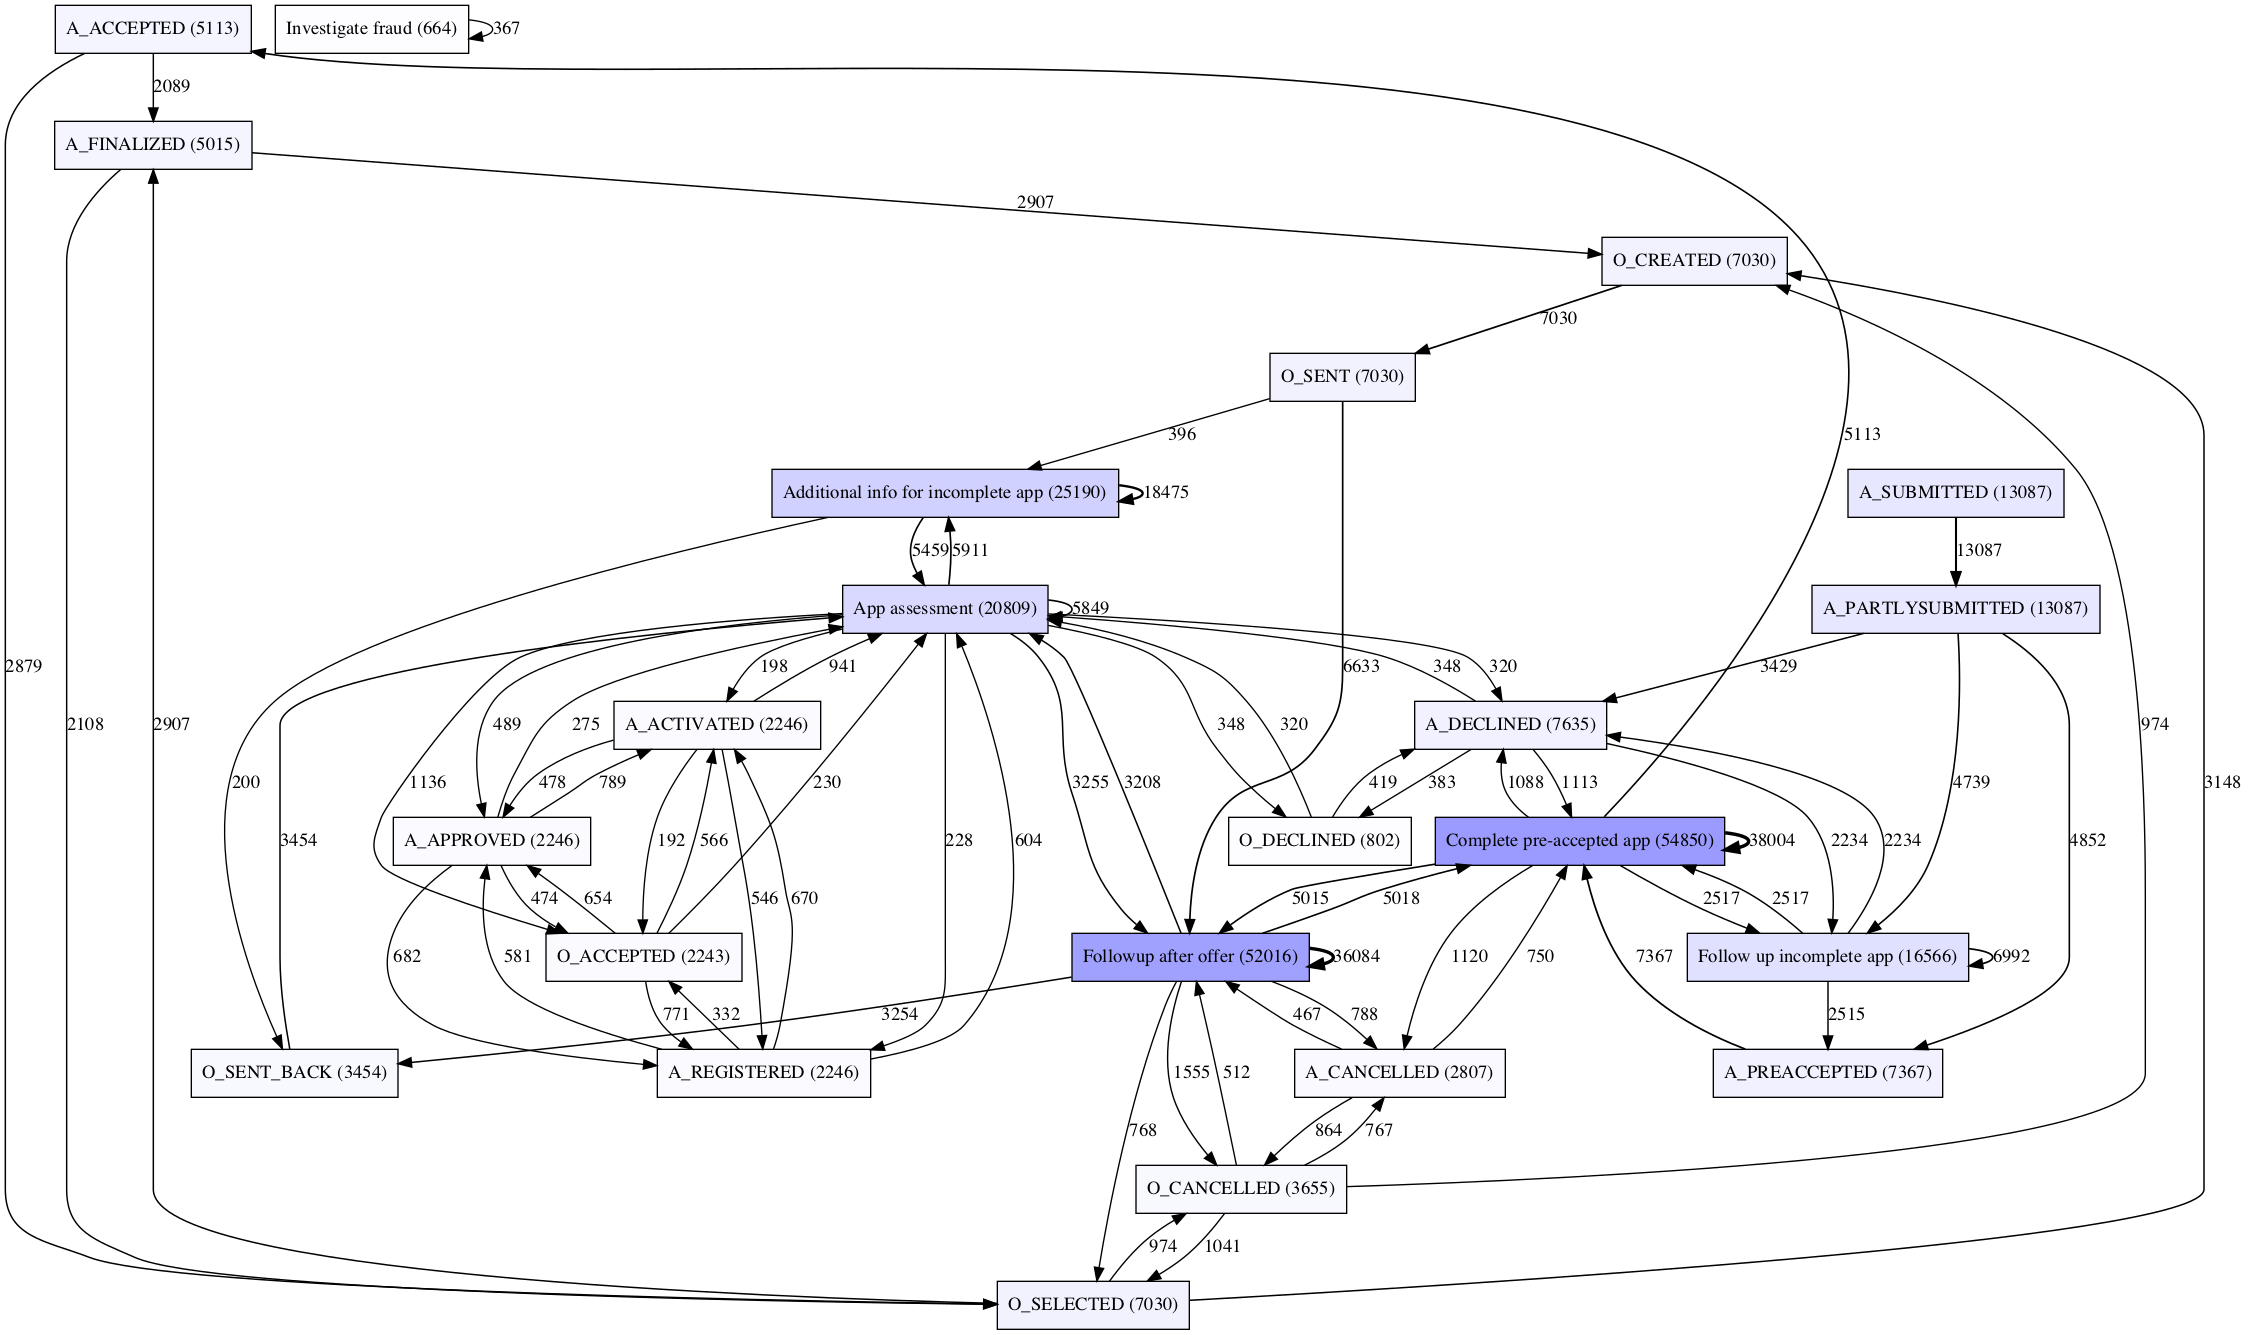

In [6]:
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.FREQUENCY)

gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

Note that in the plot above, a large amount of customers need fllowup *after* and offer has been made. Could be something to investigate.

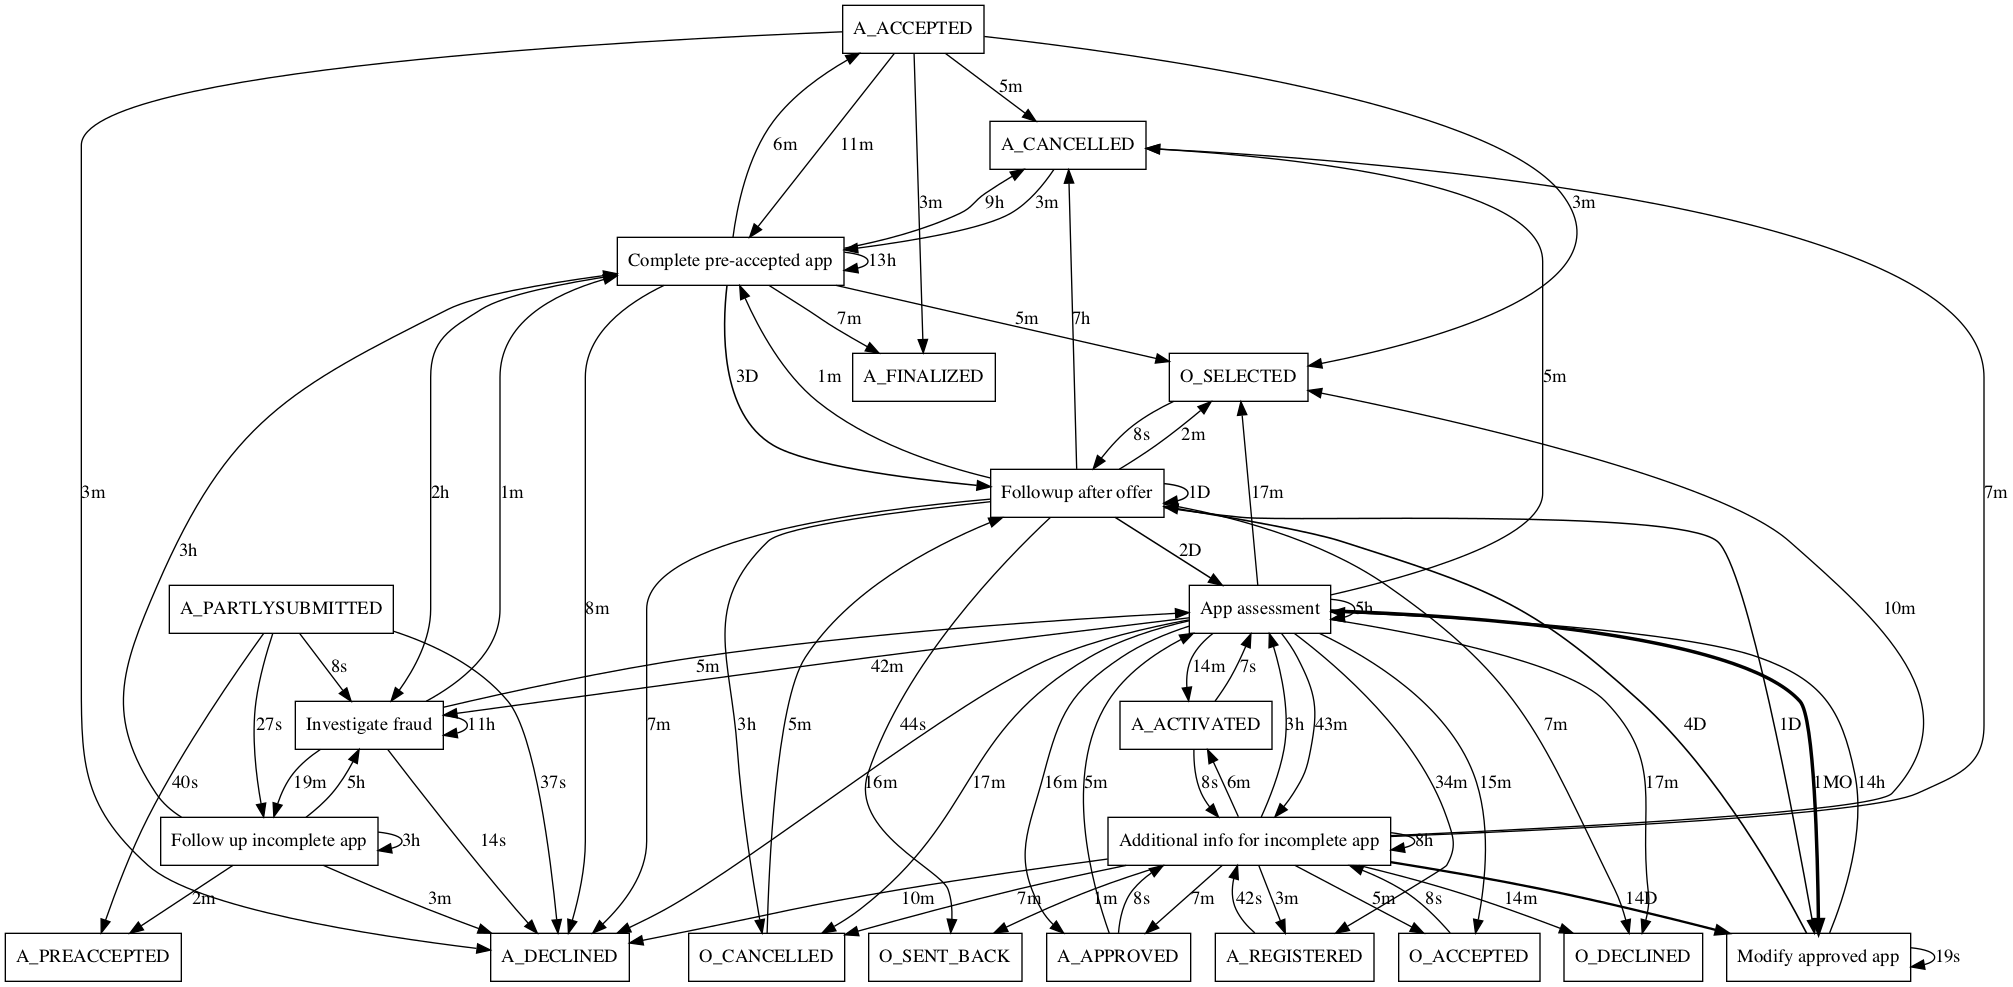

In [7]:
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

## Filtering, Diagnostics and Root Cause Analysis

Look at the difference between loand that took a long and a short amount of time

### Less than one day

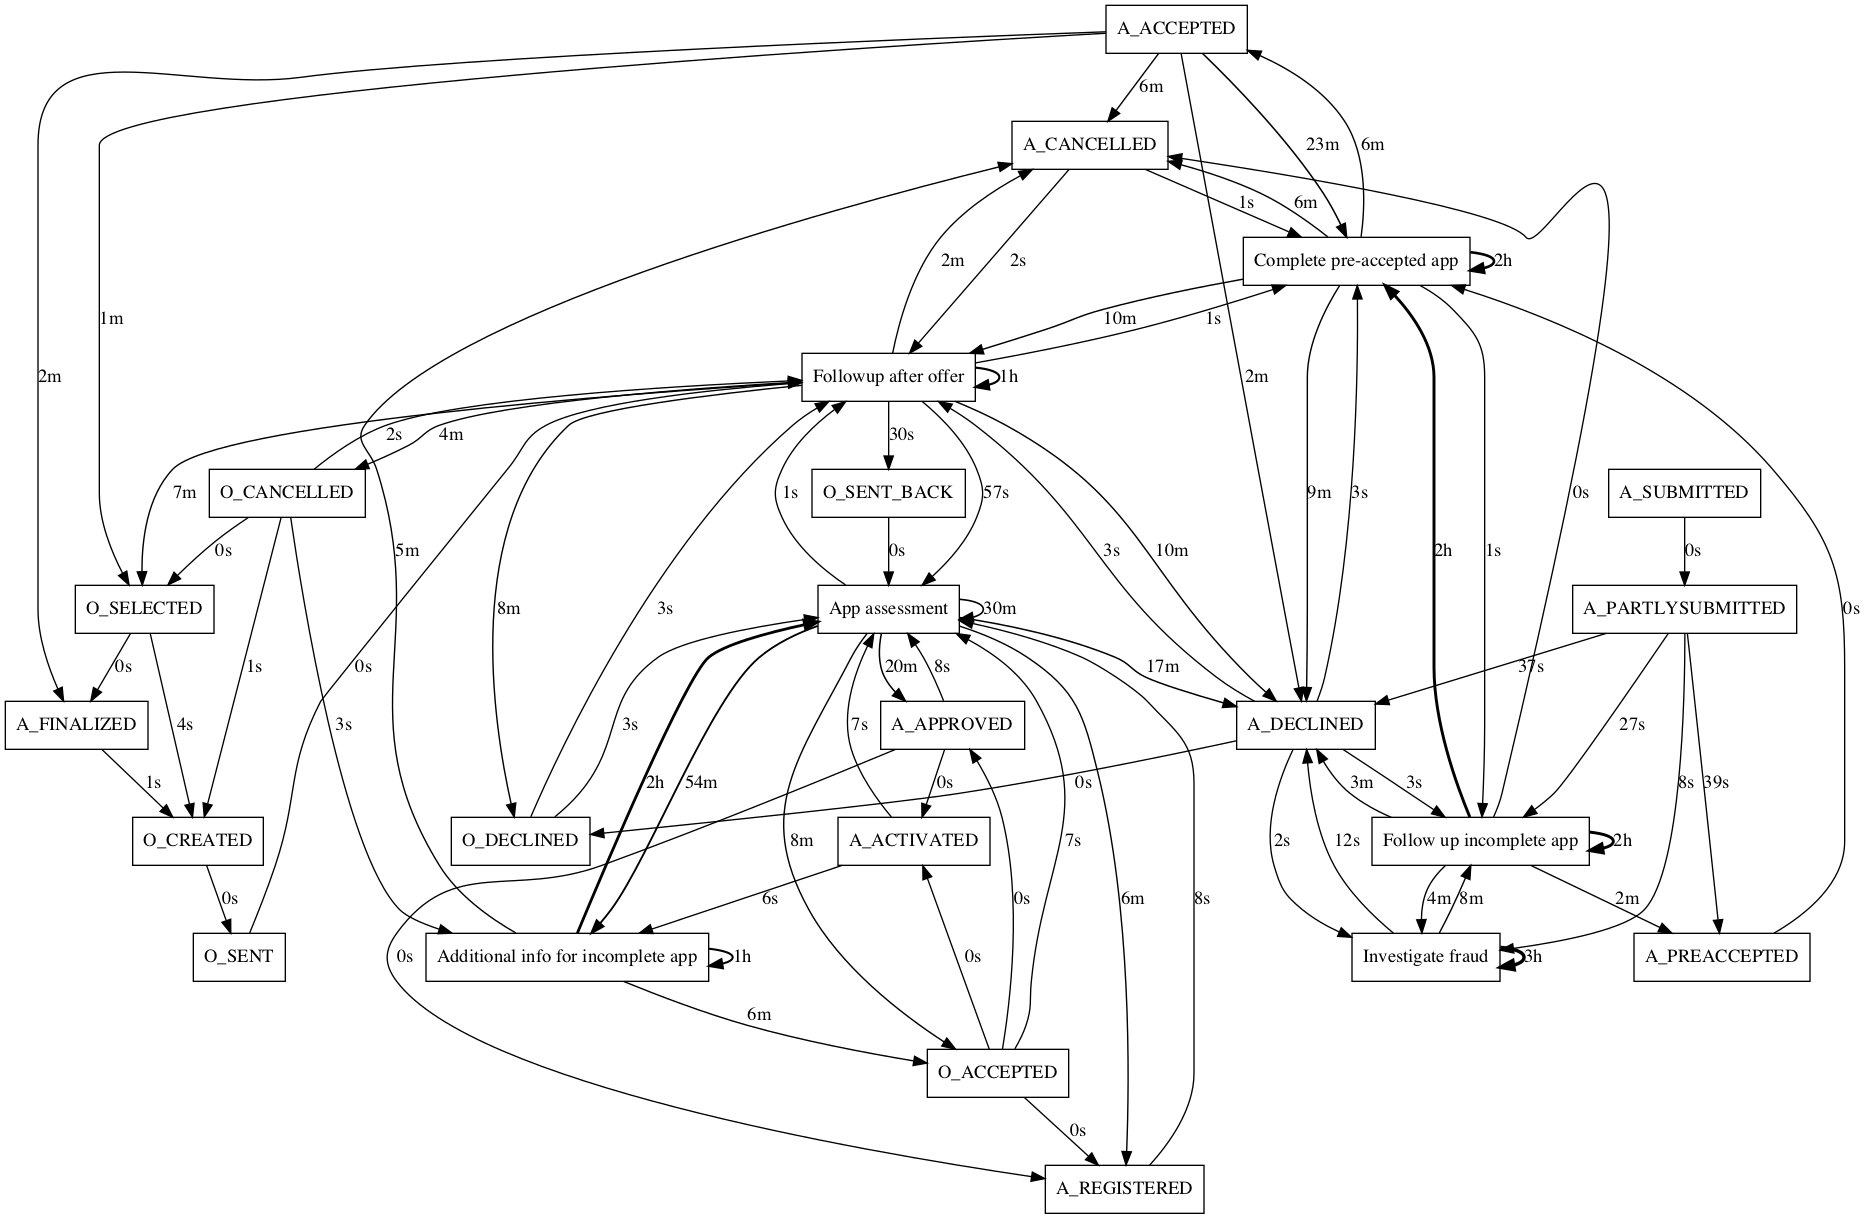

In [8]:
filtered_log = case_filter.filter_case_performance(log, 0, 86400)

dfg = dfg_discovery.apply(filtered_log, variant=dfg_discovery.Variants.PERFORMANCE)

gviz = dfg_visualization.apply(dfg, log=filtered_log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

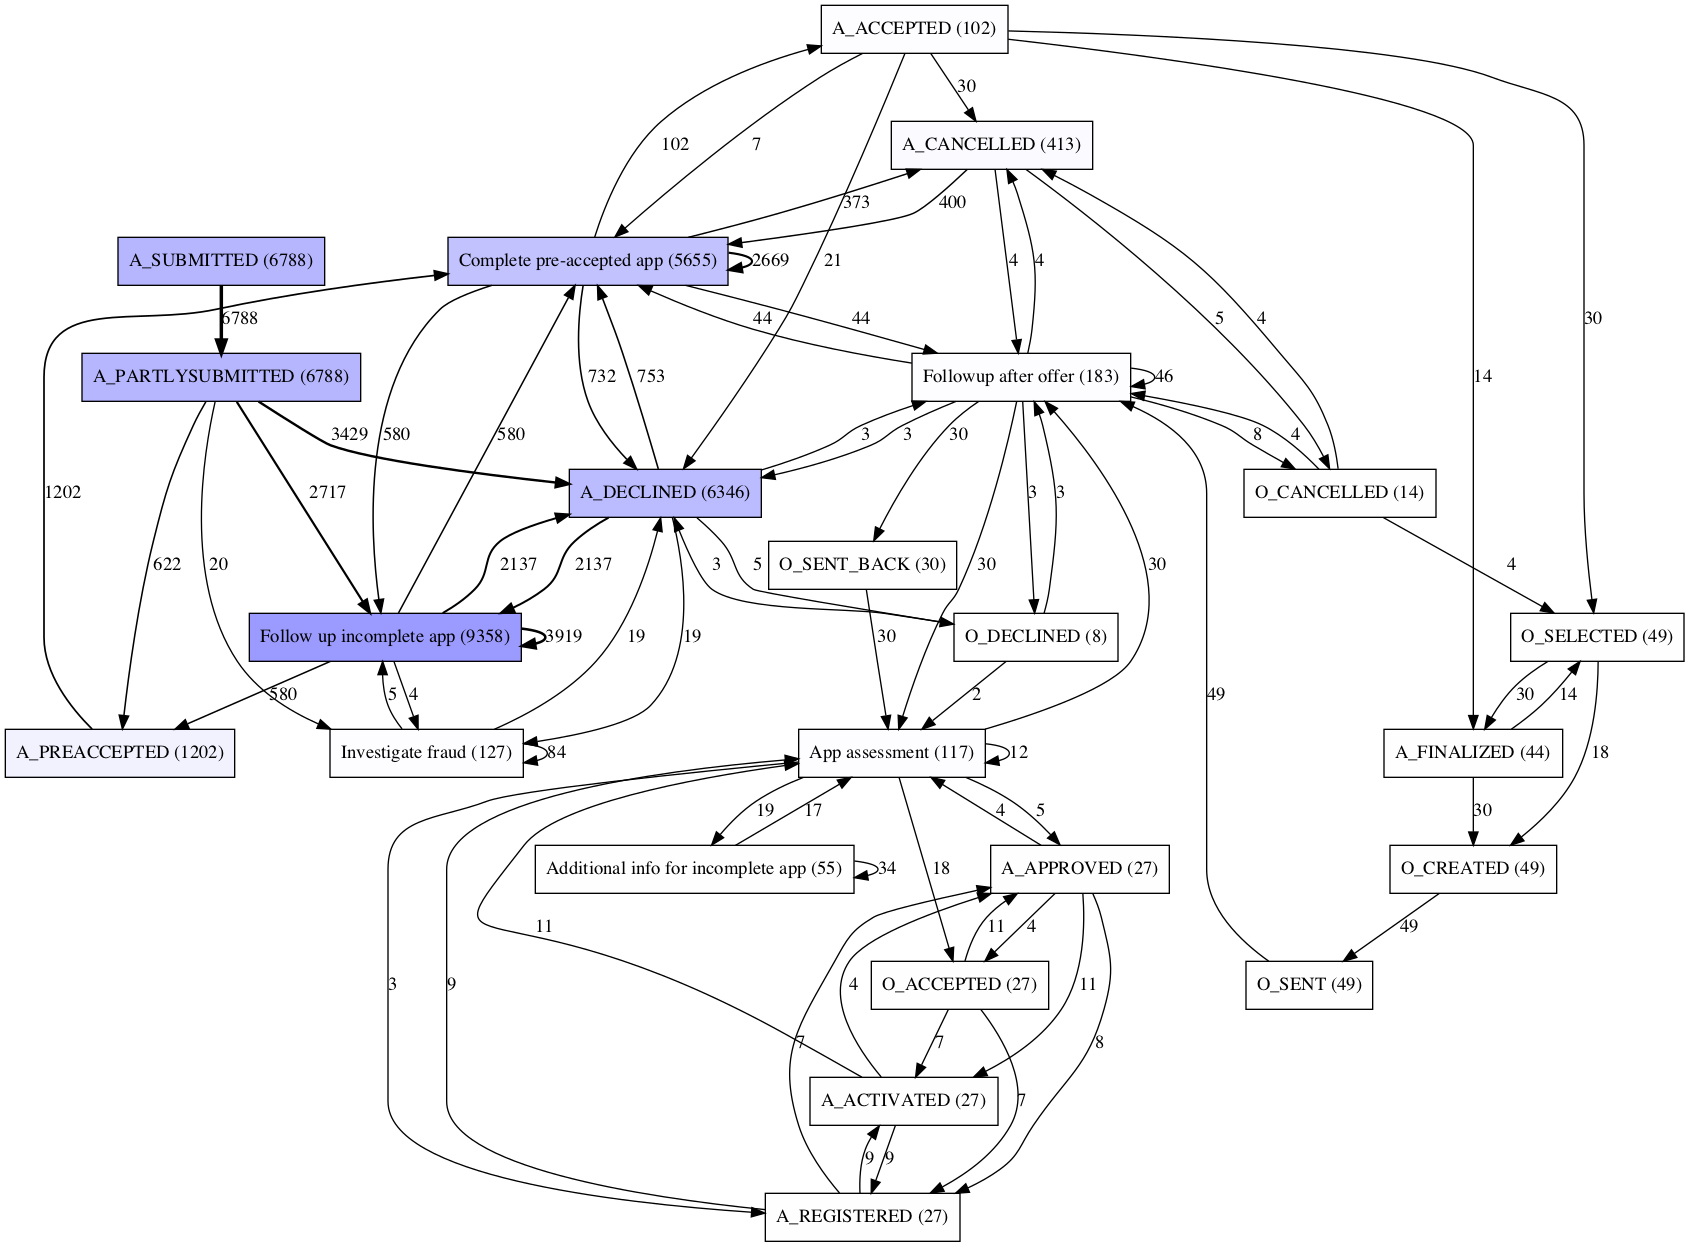

In [9]:
# Frequency for the filtered log
filtered_log = case_filter.filter_case_performance(log, 0, 86400)

dfg = dfg_discovery.apply(filtered_log, variant=dfg_discovery.Variants.FREQUENCY)

gviz = dfg_visualization.apply(dfg, log=filtered_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

### More than one day

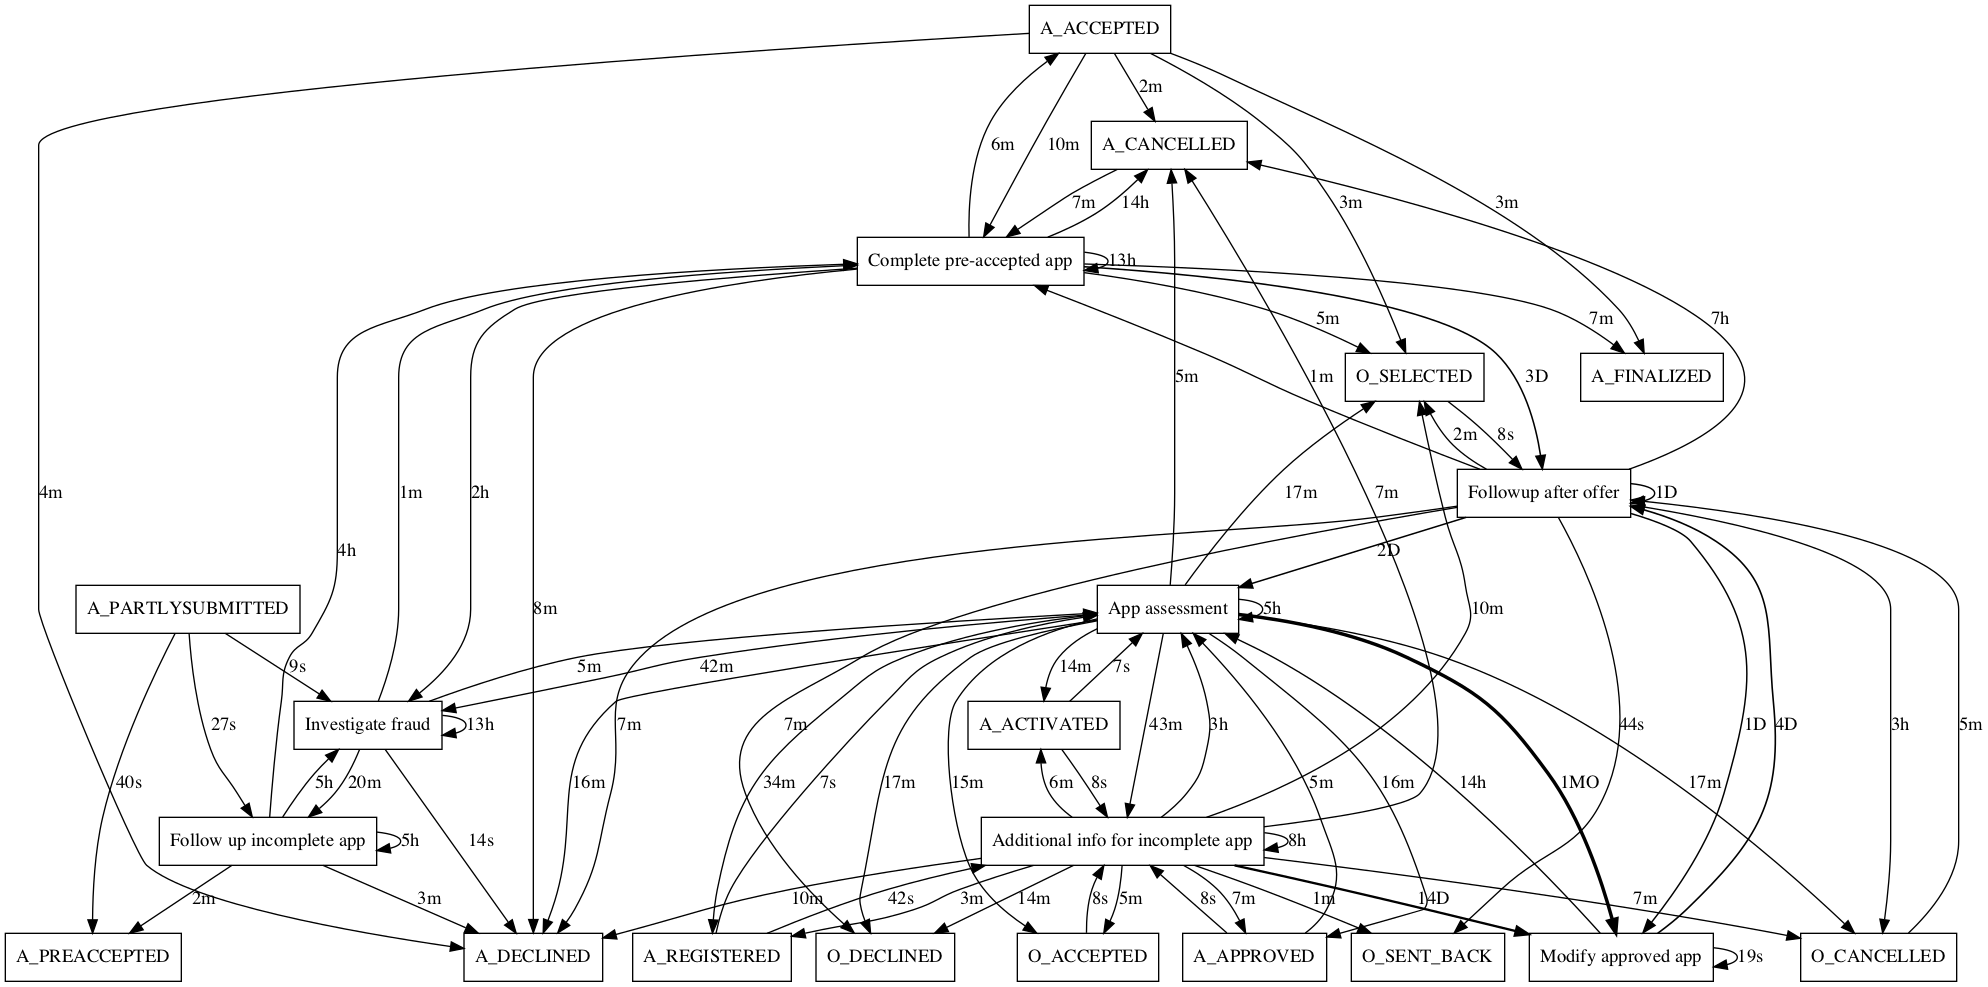

In [10]:
filtered_log = case_filter.filter_case_performance(log, 86400, 86400 * 1000)

dfg = dfg_discovery.apply(filtered_log, variant=dfg_discovery.Variants.PERFORMANCE)

gviz = dfg_visualization.apply(dfg, log=filtered_log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

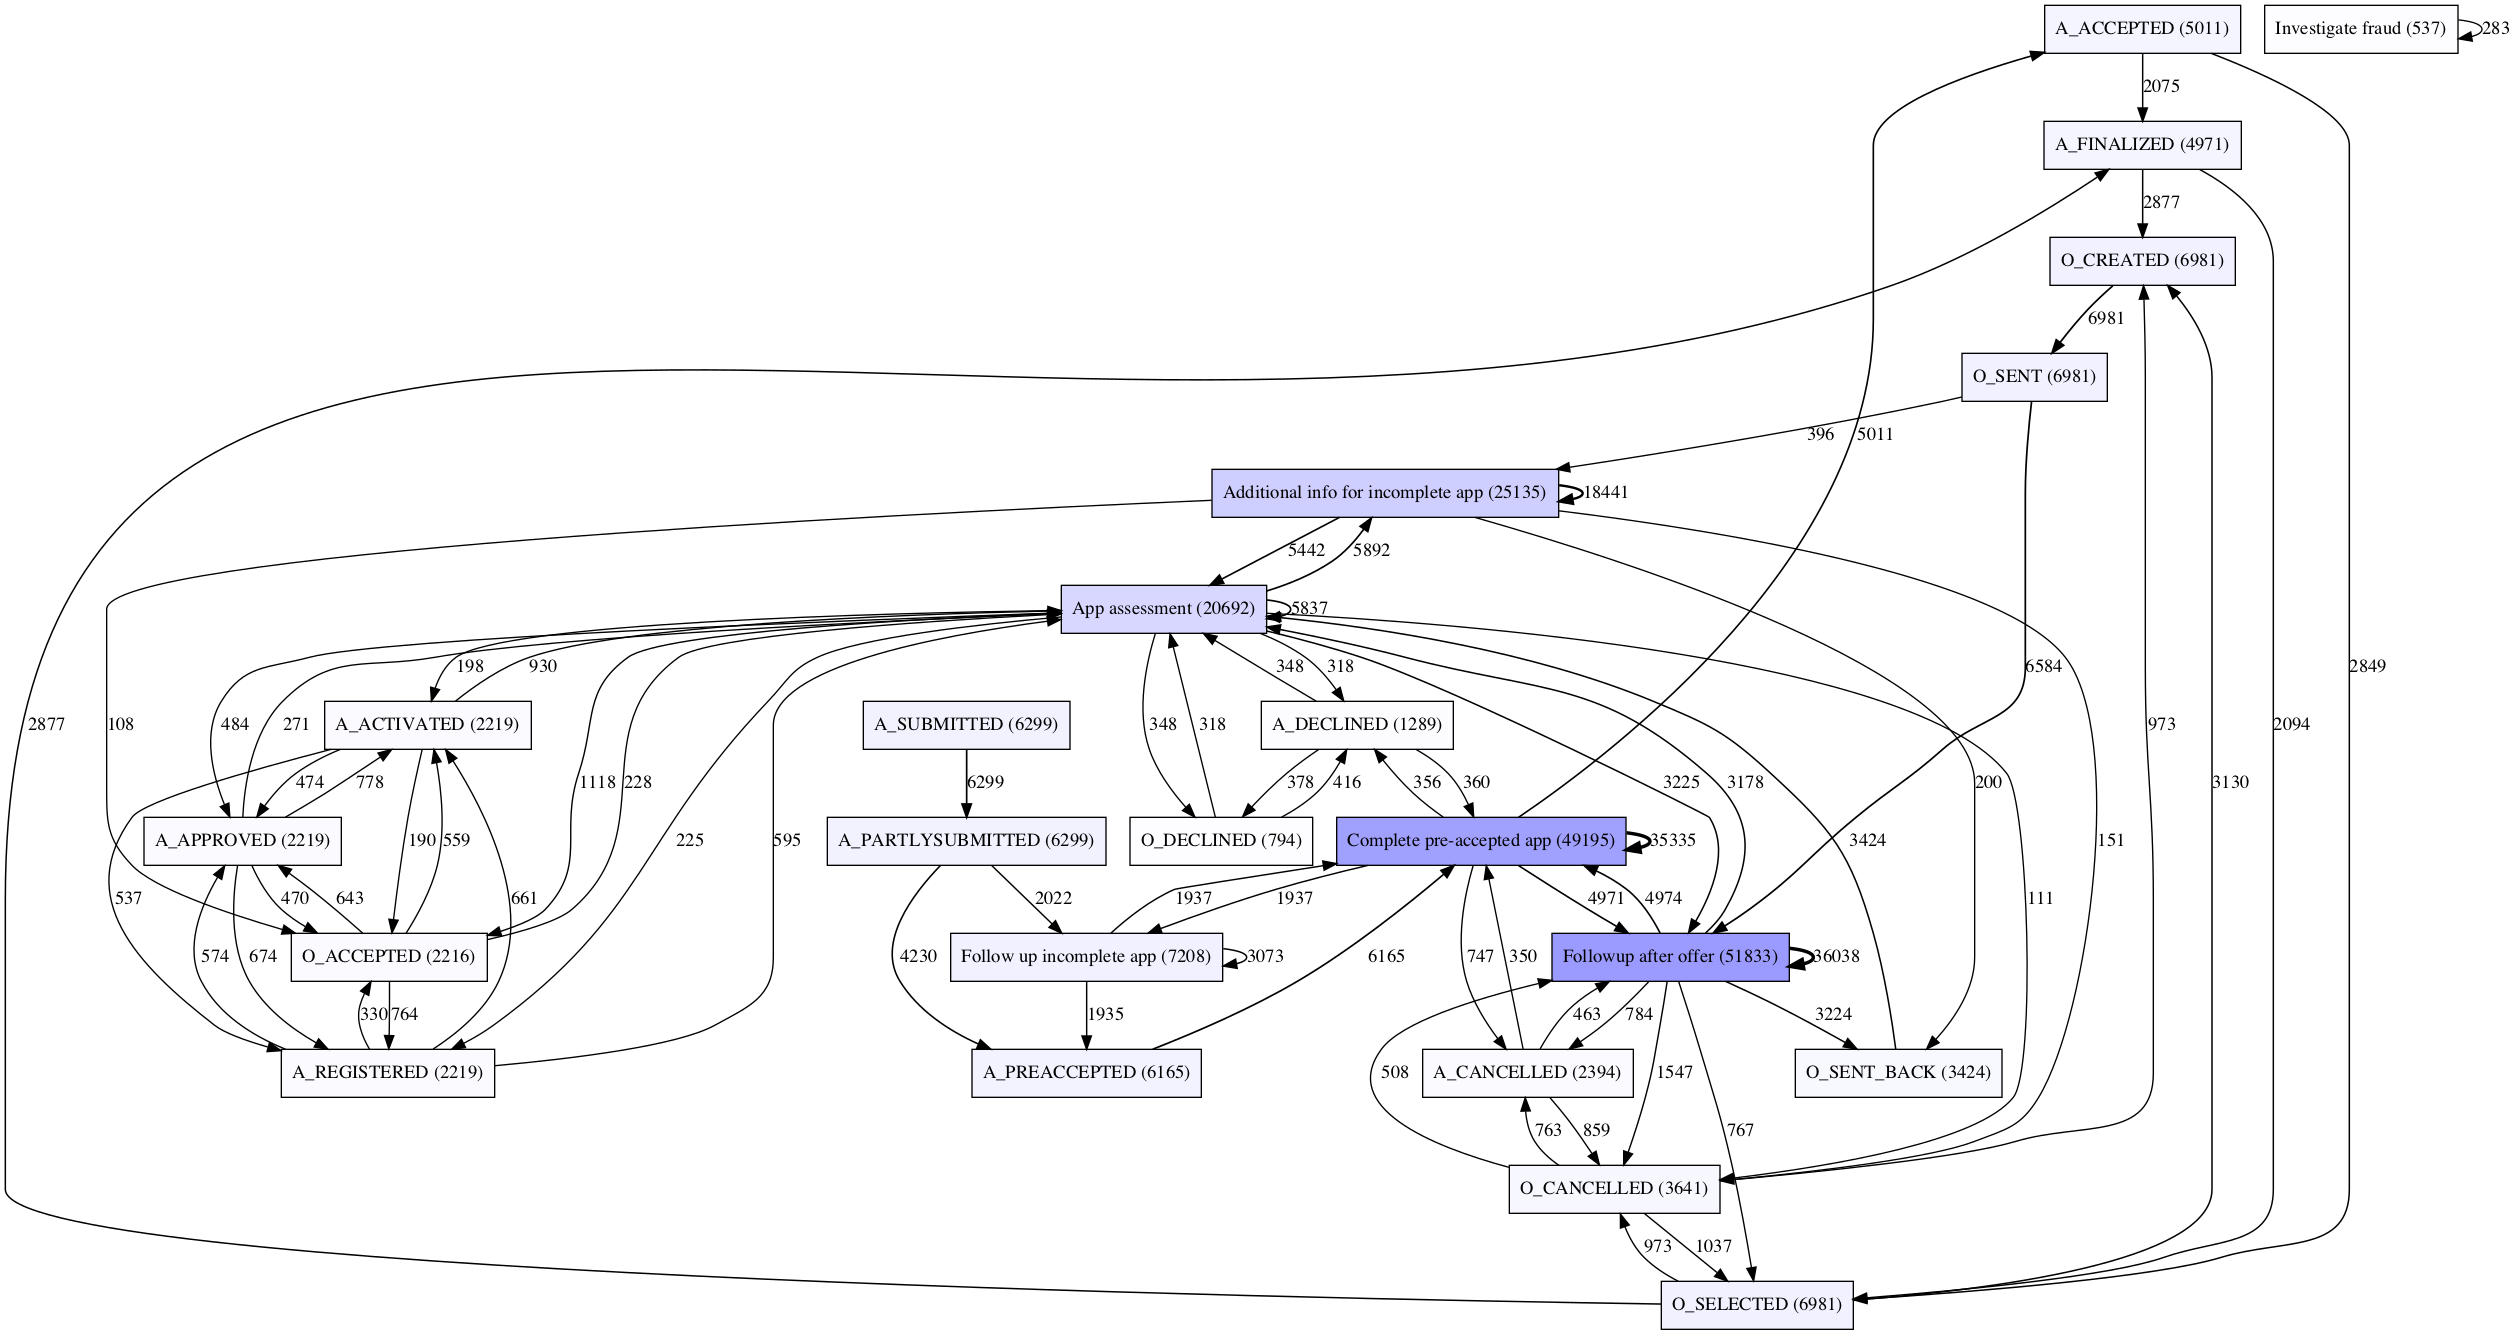

In [11]:
# Frequency for the filtered log
filtered_log = case_filter.filter_case_performance(log, 86400, 86400 * 1000)

dfg = dfg_discovery.apply(filtered_log, variant=dfg_discovery.Variants.FREQUENCY)

gviz = dfg_visualization.apply(dfg, log=filtered_log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)